In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Filtering and preparing data

In [2]:
# Dataset
df = pd.read_csv("dataset_final_concat.csv")
df.head(50)

,index,name,link,value,type
0,0,Australian National University,http://www.anu.edu.au/,ANU Our COVID-19 pathway b' html \n [if l...,Education
1,1,Monash University,http://www.monash.edu/,Monash University - one of the top universitie...,Education
2,2,University of Queensland,http://www.uq.edu.au/,The University of Queensland \n Stu...,Education
3,3,Macquarie University,http://mq.edu.au/,\n \n\n Macquarie Universi...,Education
4,4,UNSW Sydney,https://www.unsw.edu.au/,UNSW Sydney | One of the best universities in ...,Education
5,5,Newcastle University,http://www.ncl.ac.uk/,The things we do here make a difference out th...,Education
6,6,University of Wollongong,https://www.uow.edu.au/index.html,Home - University of Wollongong \xe2\x80\x93 U...,Education
7,7,University of Melbourne,http://www.unimelb.edu.au/,"The University of Melbourne, Australia - Austr...",Education
8,8,University of Tasmania,http://www.utas.edu.au/,University of Tasmania | University of Tasmani...,Education
9,9,University of Adelaide,http://www.adelaide.edu.au/,The University of Adelaide The University of A...,Education


In [3]:
# Remove linebreaks (\n) from strings
df['value'] = df['value'].apply(lambda x: x.replace("\\n", ""))
df.head()

,index,name,link,value,type
0,0,Australian National University,http://www.anu.edu.au/,ANU Our COVID-19 pathway b' html [if lt ...,Education
1,1,Monash University,http://www.monash.edu/,Monash University - one of the top universitie...,Education
2,2,University of Queensland,http://www.uq.edu.au/,The University of Queensland Study...,Education
3,3,Macquarie University,http://mq.edu.au/,Macquarie University | T...,Education
4,4,UNSW Sydney,https://www.unsw.edu.au/,UNSW Sydney | One of the best universities in ...,Education


In [4]:
# Remove HTML tags - everything between <>
import re
df['value'] = df['value'].apply(lambda x: re.sub("<.*?>", "", x))
df.head()

,index,name,link,value,type
0,0,Australian National University,http://www.anu.edu.au/,ANU Our COVID-19 pathway b' html [if lt ...,Education
1,1,Monash University,http://www.monash.edu/,Monash University - one of the top universitie...,Education
2,2,University of Queensland,http://www.uq.edu.au/,The University of Queensland Study...,Education
3,3,Macquarie University,http://mq.edu.au/,Macquarie University | T...,Education
4,4,UNSW Sydney,https://www.unsw.edu.au/,UNSW Sydney | One of the best universities in ...,Education


In [5]:
# Downloading punkt to resolve errors
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Martin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [6]:
# Remove special characters with regex
import re
df['value'] = df['value'].apply(lambda x: re.sub(r'[^A-Za-z0-9 ]+', '', str(x)))
df.head()

,index,name,link,value,type
0,0,Australian National University,http://www.anu.edu.au/,ANU Our COVID19 pathway b html if lt IE ...,Education
1,1,Monash University,http://www.monash.edu/,Monash University one of the top universities...,Education
2,2,University of Queensland,http://www.uq.edu.au/,The University of Queensland Study...,Education
3,3,Macquarie University,http://mq.edu.au/,Macquarie University Te...,Education
4,4,UNSW Sydney,https://www.unsw.edu.au/,UNSW Sydney One of the best universities in A...,Education


In [7]:
# Remove short characters
df['value'] = df['value'].apply(lambda x: " ".join([w.lower() for w in x.split() if len(w) > 2]))
df.head(50)

,index,name,link,value,type
0,0,Australian National University,http://www.anu.edu.au/,anu our covid19 pathway html endif skip naviga...,Education
1,1,Monash University,http://www.monash.edu/,monash university one the top universities aus...,Education
2,2,University of Queensland,http://www.uq.edu.au/,the university queensland study find degree st...,Education
3,3,Macquarie University,http://mq.edu.au/,macquarie university tertiary education macqua...,Education
4,4,UNSW Sydney,https://www.unsw.edu.au/,unsw sydney one the best universities australi...,Education
5,5,Newcastle University,http://www.ncl.ac.uk/,the things here make difference out there newc...,Education
6,6,University of Wollongong,https://www.uow.edu.au/index.html,home university wollongong xe2x80x93 uow study...,Education
7,7,University of Melbourne,http://www.unimelb.edu.au/,the university melbourne australia australias ...,Education
8,8,University of Tasmania,http://www.utas.edu.au/,university tasmania university tasmania browse...,Education
9,9,University of Adelaide,http://www.adelaide.edu.au/,the university adelaide the university adelaid...,Education


In [8]:
# Downloading stopwords to resolve errors
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Martin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [9]:
# Stop word removal with nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
stop_words.update(["html", "endif"])

df['value'] = df['value'].apply(lambda x: " ".join([word for word in word_tokenize(x) if word not in stop_words]))
df.head()

,index,name,link,value,type
0,0,Australian National University,http://www.anu.edu.au/,anu covid19 pathway skip navigation,Education
1,1,Monash University,http://www.monash.edu/,monash university one top universities austral...,Education
2,2,University of Queensland,http://www.uq.edu.au/,university queensland study find degree study ...,Education
3,3,Macquarie University,http://mq.edu.au/,macquarie university tertiary education macqua...,Education
4,4,UNSW Sydney,https://www.unsw.edu.au/,unsw sydney one best universities australia ex...,Education


In [10]:
# stem the words
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

df['value'] = df['value'].apply(lambda sentence : " ".join([stemmer.stem(word) for word in sentence.split(" ")]))
df.head()

,index,name,link,value,type
0,0,Australian National University,http://www.anu.edu.au/,anu covid19 pathway skip navig,Education
1,1,Monash University,http://www.monash.edu/,monash univers one top univers australia home ...,Education
2,2,University of Queensland,http://www.uq.edu.au/,univers queensland studi find degre studi skip...,Education
3,3,Macquarie University,http://mq.edu.au/,macquari univers tertiari educ macquari univer...,Education
4,4,UNSW Sydney,https://www.unsw.edu.au/,unsw sydney one best univers australia explor ...,Education


In [23]:
# Removing rows, where 'value' is nan
print(df['value'].isna().sum())
print(df.shape)

df = df[df['value'].notna()]

print(df['value'].isna().sum())
print(df.shape)

1211
(83796, 6)
0
(82585, 6)


# Bow vectorizer

In [3]:
# feature extraction
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow = bow_vectorizer.fit_transform(df['value'])

In [4]:
for b in bow[:10]:
    print(b.toarray())

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

In [5]:
df['type'] = df['type'].astype('category')
# df['type'] = df['type'].cat.codes
categories_dict = dict(enumerate(df['type'].cat.categories))
df['type'] = df['type'].cat.codes

df['type']

0        2
1        2
2        2
3        2
4        2
        ..
82580    1
82581    2
82582    2
82583    7
82584    5
Name: type, Length: 82585, dtype: int8

In [6]:
categories_dict

{0: 'Archive',
 1: 'Company',
 2: 'Education',
 3: 'Facility',
 4: 'Government',
 5: 'Healthcare',
 6: 'Nonprofit',
 7: 'Other'}

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(bow, df["type"], random_state=42, test_size=0.25)

### Logistic Regresion Model

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score

In [9]:
# training
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [10]:
# testing
pred = model.predict(X_test)
print(f"F1 Score:               {round(f1_score(y_test, pred, average='micro'), 3)}")
print(f"Percentual F1 Score:    {round(f1_score(y_test, pred, average='micro') * 100, 2)} %")

F1 Score:               0.601
Percentual F1 Score:    60.12 %


In [11]:
print(f"Accuracy Score:                 {round(accuracy_score(y_test, pred), 3)}")
print(f"Percentual Accuracy Score:      {round(accuracy_score(y_test, pred) * 100, 2)} %")

Accuracy Score:                 0.601
Percentual Accuracy Score:      60.12 %


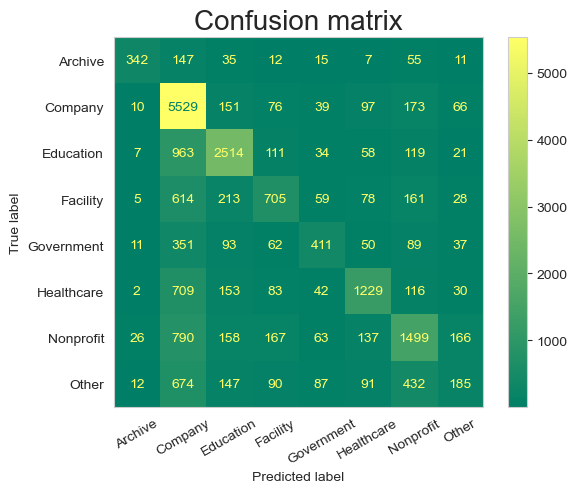

In [12]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

labels = [categories_dict[c] for c in model.classes_]

cm = confusion_matrix(y_test, pred, labels=model.classes_)
# disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap='summer')
plt.rcParams["figure.figsize"] = (7, 7)
plt.grid(False)
plt.title("Confusion matrix", fontsize=20)
plt.xticks(rotation=30)
plt.show()

## Word embedding

In [35]:
from nltk.tokenize import sent_tokenize, word_tokenize
import gensim
from gensim.models import Word2Vec

In [36]:
import warnings
warnings.filterwarnings(action='ignore')

In [20]:
model1 = Word2Vec(df['title'].tolist(), min_count=1, vector_size=100, window=5)

In [22]:
# words = list(model1.wv.key_to_index)
# words

['home',
 'university',
 'universidad',
 'technology',
 'college',
 'health',
 'engineering',
 'future',
 'welcome',
 'care',
 'international',
 'company',
 'better',
 'pivovarsk',
 'universidade',
 'lilly',
 'systematic',
 'lukrom',
 'kunskapsbolaget',
 'reviews',
 'that',
 'solutions',
 'medical',
 'research',
 'aitek',
 'server',
 'video',
 'salamanca',
 'group',
 'innovative',
 'univille',
 'dubai',
 'multiscreen',
 'metropolitana',
 'umla',
 'genefluidics',
 'campus',
 'innovatia',
 'xbchler',
 'innovate',
 'latin',
 'innovations',
 'inicio',
 'social',
 'world',
 'zamora',
 'applications',
 'maintenance',
 'experience',
 'software',
 'interaction',
 'nice',
 'noterik',
 'customer',
 'tolerante',
 'para',
 'studia',
 'forks',
 'grand',
 'east',
 'technical',
 'community',
 'northland',
 'mtaa',
 'rsau',
 'main',
 'xb3jmiasto',
 'x84sk',
 'xbcsza',
 'uczelnia',
 'gdynia',
 'wsaib',
 'vida',
 'yogyakarta',
 'instiper',
 'miyazaki',
 'widyatama',
 'universitas',
 'excellence',
 'acad

In [23]:
# model1.wv['university']

array([-8.6950343e-03,  3.7087623e-03,  5.2420925e-03,  5.7465034e-03,
        7.5341244e-03, -6.1776172e-03,  1.1682920e-03,  6.1499341e-03,
       -2.8569617e-03, -6.1844853e-03, -4.5765229e-04, -8.4674312e-03,
       -5.6817210e-03,  7.0501966e-03,  3.3904954e-03,  7.1568084e-03,
        6.7197988e-03,  7.4638627e-03, -3.8720090e-03, -6.5899309e-04,
        2.3513932e-03, -4.5180474e-03,  8.3733918e-03, -9.8684635e-03,
        6.7824037e-03,  2.9601676e-03, -4.9841139e-03,  4.3616612e-03,
       -1.7626288e-03,  6.6802553e-03,  9.9993628e-03, -4.3722144e-03,
       -6.3214928e-04, -5.7001826e-03,  3.7799408e-03,  2.7956725e-03,
        6.9439462e-03,  6.0233120e-03,  9.4923321e-03,  9.1640418e-03,
        8.0095576e-03, -7.0530646e-03, -9.1888215e-03, -3.3967712e-04,
       -3.0517427e-03,  7.7859992e-03,  5.9403940e-03, -1.5417126e-03,
        1.5900094e-03,  1.7599098e-03,  7.8572752e-03, -9.6420860e-03,
       -1.6119778e-04,  3.4920792e-03, -9.4249210e-04,  8.4684901e-03,
      

## Training

In [38]:
from sklearn.model_selection import train_test_split

X = df['title']
y = pd.get_dummies(df['type'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [39]:
df[df['type'] == 'Education'].count()

index    15752
name     15752
link     15752
type     15752
dtype: int64

array([[<AxesSubplot:title={'center':'Company'}>,
        <AxesSubplot:title={'center':'Education'}>]], dtype=object)

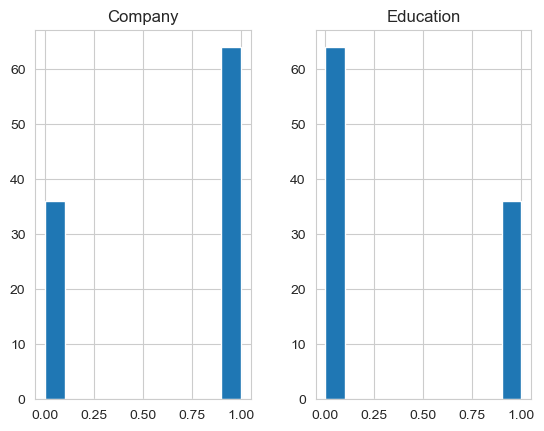

In [40]:
# X
y.hist()

In [41]:
df.head()

,index,name,link,type,title
411,491,Leipzig University,https://www.uni-leipzig.de/en/,Education,Universit xa4t Leipzig leipzig
699,826,Royal Military Academy,http://www.rma.ac.be/en/,Education,Homepage
1283,1537,Ion Ionescu de la Brad University of Agricultu...,http://www.uaiasi.ro/index.php?lang=en,Education,Ionescu Brad Iasi University Life Sciences IULS
1588,1904,Adelphi University,http://www.adelphi.edu/,Education,Adelphi University Higher Education College Lo...
1789,2119,Eckerd College,https://www.eckerd.edu/,Education,Liberal Arts College Florida Eckerd College


In [42]:
from keras.preprocessing.text import one_hot
from keras_preprocessing.sequence import pad_sequences

my_vocab_size = 300
encoded_train = [one_hot(w, my_vocab_size) for w in X_train]
encoded_train

[[285, 27, 249, 298],
 [144, 83, 287, 39, 262, 132, 282],
 [223, 282, 132, 269, 133, 273],
 [196, 166, 74, 32],
 [81],
 [115, 125, 279, 212, 16],
 [109, 262],
 [266, 266],
 [264, 57, 240, 33, 174, 264],
 [109, 57, 237],
 [36, 14, 223, 18, 130, 207, 10, 113],
 [112],
 [258, 285, 178, 249, 282, 116, 198],
 [232, 25],
 [78, 165, 91],
 [109, 139, 285],
 [234, 222, 153, 168, 272, 57, 74, 38, 296, 77, 253, 188, 125, 196, 3],
 [72, 145, 190, 220, 58, 237],
 [],
 [109, 153],
 [97, 285, 57, 69, 274, 85],
 [137, 22, 274, 213, 70, 137, 295],
 [79, 270, 214, 163, 19, 79, 270, 214, 163, 19],
 [16, 109],
 [168, 156, 5, 167, 34, 20, 69],
 [56, 44, 217],
 [3, 263],
 [93, 267, 142, 142],
 [],
 [250, 222, 242, 242, 242],
 [133, 224, 224, 91],
 [144, 243, 109, 100, 153],
 [285, 161, 169, 168, 282, 296, 56, 285],
 [277, 50, 249, 173, 242, 286, 21],
 [109],
 [159, 113, 91, 195, 159, 113, 91],
 [227],
 [150, 66, 224, 7, 239, 293, 199],
 [32, 109],
 [109, 285, 147],
 [86, 86],
 [183, 59, 43, 68, 189, 243, 21

In [43]:
# length = max([len(s) for s in encoded_train])
length = 30
print(length)
padded_train = pad_sequences(encoded_train, maxlen=length, padding='pre')
padded_train

30


array([[  0,   0,   0, ...,  27, 249, 298],
       [  0,   0,   0, ..., 262, 132, 282],
       [  0,   0,   0, ..., 269, 133, 273],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ..., 267, 190, 165],
       [  0,   0,   0, ..., 109,  84,  69]])

In [44]:
X_train.shape[0]

70

In [51]:
from keras.models import Sequential
from keras import layers

model = Sequential()
model.add(layers.Embedding(my_vocab_size, 1, input_length=length))
model.add(layers.Flatten())
model.add(layers.Dense(2, activation='sigmoid'))
model.summary()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']) # f1-score / f2-score
model.fit(padded_train, y_train, epochs=20)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 30, 1)             300       
                                                                 
 flatten_3 (Flatten)         (None, 30)                0         
                                                                 
 dense_4 (Dense)             (None, 2)                 62        
                                                                 
Total params: 362
Trainable params: 362
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
3/3 [==============================] - 1s 2ms/step - loss: 0.6923 - accuracy: 0.4857
Epoch 2/20
3/3 [==============================] - 0s 2ms/step - loss: 0.6913 - accuracy: 0.5714
Epoch 3/20
3/3 [==============================] - 0s 2ms/step - loss: 0.6902 - accuracy: 0.6429
Epoch 4/20
3/3 [================

In [52]:
loss, accuracy = model.evaluate(padded_train, y_train, verbose=0)
print(f'Accuracy: {accuracy*100}%')
print(f'Loss: {loss*100}%')

Accuracy: 64.28571343421936%
Loss: 66.5788471698761%


## Prediction

In [53]:
encoded_test = [one_hot(d, my_vocab_size) for d in X_test]
encoded_test

[[93, 283, 202, 285, 84, 69, 57],
 [96, 197, 170],
 [170, 54, 156],
 [283, 287],
 [],
 [73, 5, 113, 67, 90, 58, 199, 179, 69, 132, 232, 213],
 [62, 3, 125, 289, 125, 62],
 [42, 109, 179, 176, 279, 231, 141],
 [296, 268],
 [186, 265, 76, 50, 3],
 [109, 167],
 [19, 47, 209, 154, 236, 102, 237],
 [125, 25, 214, 193],
 [161, 214, 68],
 [154],
 [77, 294, 42, 260, 95, 231, 102, 146, 36],
 [39, 285],
 [],
 [179, 190, 112],
 [122, 12, 133],
 [195, 212, 233, 124, 262, 18, 38, 233],
 [237, 44, 3, 264, 237, 44],
 [262, 73, 285, 106, 296, 285, 281],
 [196, 237, 196],
 [162],
 [198, 222, 198, 222, 81],
 [57, 100],
 [],
 [],
 [140, 8]]

In [54]:
# max_length = max([len(s) for s in encoded_test])
max_length = 30
padded_test = pad_sequences(encoded_test, maxlen=max_length, padding='pre')
padded_test

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  93, 283, 202,
        285,  84,  69,  57],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  96, 197, 170],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0, 170,  54, 156],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0, 283, 287],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,  73,   5, 113,  67,

In [55]:
predictions = model.predict(padded_test)
# predictions = np.argmax(predictions, axis=1)
predictions

1/1 [==============================] - 0s 103ms/step


array([[0.5437173 , 0.4584041 ],
       [0.5365406 , 0.46633968],
       [0.5448143 , 0.45645759],
       [0.53566754, 0.46743187],
       [0.5381318 , 0.47471654],
       [0.53397644, 0.4745932 ],
       [0.54288816, 0.46179783],
       [0.5364037 , 0.47644925],
       [0.53896075, 0.46993384],
       [0.53859293, 0.46174416],
       [0.53411174, 0.47517934],
       [0.53559965, 0.46202266],
       [0.5409792 , 0.46502942],
       [0.54475975, 0.45993534],
       [0.5402793 , 0.46859512],
       [0.5286595 , 0.47910473],
       [0.53586435, 0.47503412],
       [0.5381318 , 0.47471654],
       [0.5427069 , 0.4655775 ],
       [0.53981924, 0.46293086],
       [0.5522755 , 0.4609692 ],
       [0.545287  , 0.4732072 ],
       [0.53687376, 0.48162746],
       [0.53488326, 0.47270864],
       [0.53861845, 0.47332904],
       [0.5368256 , 0.47181955],
       [0.5359697 , 0.46593273],
       [0.5381318 , 0.47471654],
       [0.5381318 , 0.47471654],
       [0.5359126 , 0.463321  ]], dtype=flo

In [56]:
y_test

,Company,Education
1283,0,1
14239,1,0
20484,1,0
76435,1,0
61688,0,1
35187,1,0
58045,0,1
22009,1,0
3986,0,1
37514,1,0
